Problem statement.

**Data:** Sensor Data

**Problem statement :**
- The system in focus is the Air Pressure system (APS) which generates pressurized air that are utilized in various functions in a truck, such as braking and gear changes. The datasets positive class corresponds to component failures for a specific component of the APS system. The negative class corresponds to trucks with failures for components not related to the APS system.

- The problem is to reduce the cost due to unnecessary repairs. So it is required to minimize the false predictions.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/avnyadav/sensor-fault-detection/main/aps_failure_training_set1.csv',na_values="na")

In [5]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [6]:
df["class"].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 47.2+ MB


In [8]:
df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,3.618800e+04,8292.000000,3.404700e+04,2.698800e+04,34601.000000,34601.000000,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,...,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,34458.000000,34459.000000
mean,6.591016e+04,0.711770,3.535223e+08,3.185447e+05,7.234300,11.606543,1.952347e+02,1.508277e+03,1.250718e+04,1.156928e+05,...,4.853621e+05,2.293208e+05,4.837846e+05,4.401019e+05,3.686943e+05,3.718051e+05,1.485117e+05,8.897664e+03,0.083464,0.209234
std,1.641238e+05,3.054033,7.926486e+08,5.225398e+07,186.437282,234.405353,1.852862e+04,4.371360e+04,1.801543e+05,8.853380e+05,...,1.254188e+06,5.948054e+05,1.251106e+06,1.331837e+06,1.220688e+06,1.722483e+06,5.153265e+05,5.316375e+04,3.789020,8.613915
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.660000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.986000e+03,1.190000e+03,2.732000e+03,3.680000e+03,5.660000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.102600e+04,0.000000,1.520000e+02,1.280000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.378500e+05,1.137840e+05,2.263560e+05,1.952480e+05,9.559400e+04,4.296600e+04,4.278000e+03,0.000000e+00,0.000000,0.000000
75%,5.006850e+04,0.000000,9.640000e+02,4.320000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.470120e+05,2.222860e+05,4.748680e+05,4.103280e+05,2.791920e+05,1.706080e+05,1.432300e+05,2.018000e+03,0.000000,0.000000
max,2.746564e+06,100.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,2.904730e+07,...,3.123272e+07,1.676929e+07,2.747758e+07,5.743524e+07,3.160781e+07,3.727856e+07,1.926740e+07,3.810078e+06,362.000000,1146.000000


In [9]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != object]
categorical_features = [feature for feature in df.columns if df[feature].dtype == object]

print("numeric_features ({}): {}".format(len(numeric_features), numeric_features))
print("categorical_features ({}): {}".format(len(categorical_features), categorical_features))

numeric_features (170): ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000

## Checking missing value

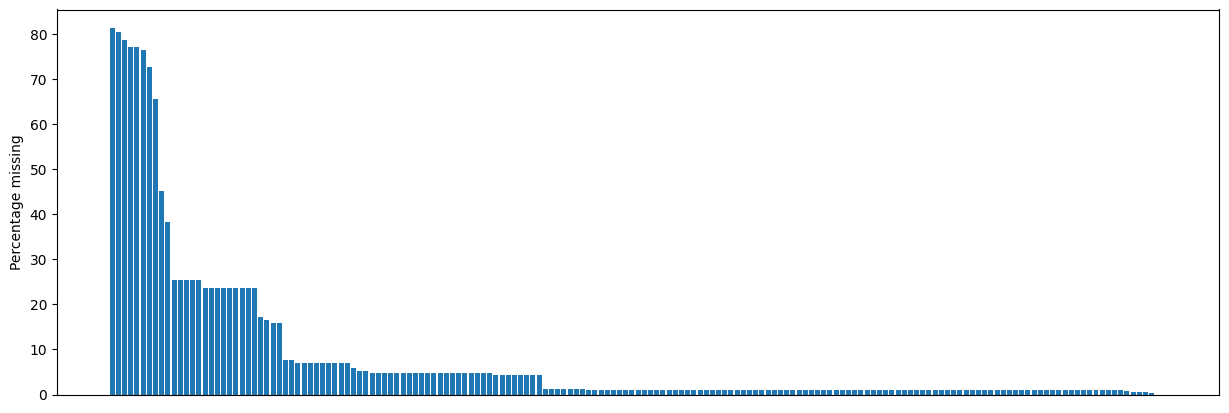

In [10]:
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

## Droping columns which has more than 70% of missing values

In [11]:
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [12]:
df.drop(list(dropcols.index), axis=1, inplace=True)

In [13]:
df.shape

(36188, 164)

In [14]:
import numpy as np

missing_values_count = df.isnull().sum()
total_cells = np.prod(df.shape)
total_missing = missing_values_count.sum()

print("Percentage of missing data: {:.2f}%".format((total_missing / total_cells) * 100))

Percentage of missing data: 5.37%


Positive: 1000, Negative: 35188


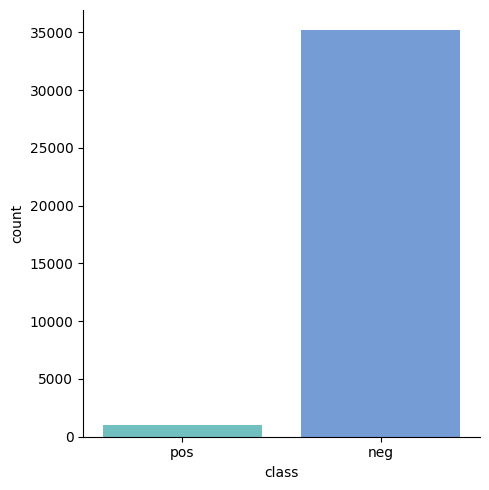

In [15]:
pos = df[df['class']=='pos'].shape[0]
neg = df[df['class']=='neg'].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=df, x="class", kind="count", palette="winter_r", alpha=.6)
plt.show()

In [16]:
def evaluate_clf(true, predicted):
    '''
    This function take the true values and predicted values
    Returns: Accuracy, f1-score, Precision, Recall, Roc-Auc Score
    '''
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)

    return acc, f1, precision, recall, roc_auc

In [29]:
# create the cost of a model as per discription
def total_cost(y_true, y_pred):
    '''
    This function take y_true and y_pred and print the total cost due to misclassifation 
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn

    return cost

In [18]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

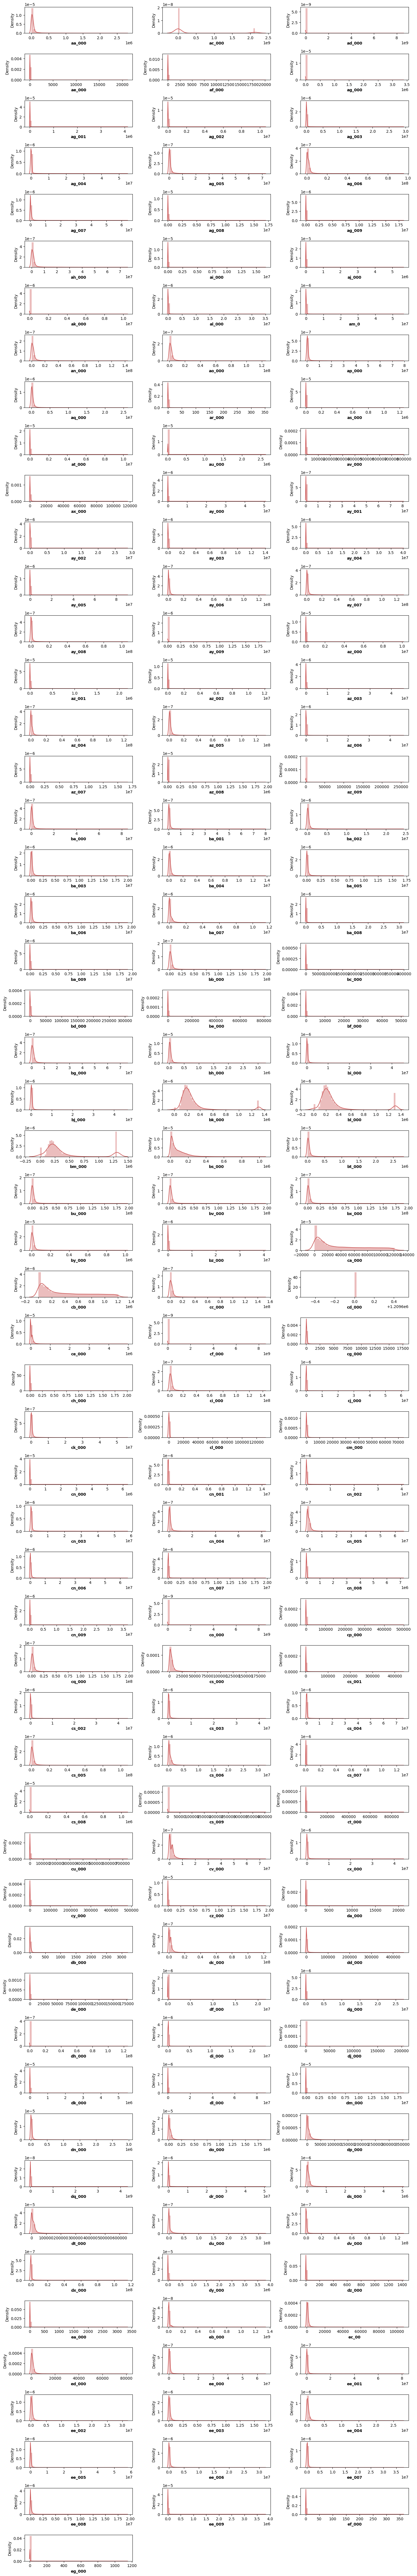

In [19]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [20]:
# Splitting X and y for all Experiments
X= df.drop('class', axis=1)
y = df['class']

In [21]:
y= y.replace({'pos': 1, 'neg': 0})

### Experiment: 1 = KNN Imputer for Null values

In [22]:
# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [23]:
from sklearn import neighbors


result = []

# try different values of k
neighbors_list = [1,3,5,7,9]

for k in neighbors_list:
    # create pipeline
    pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=k)),
        ('model', LogisticRegression())
    ])

    # cross-validate the Pipeline
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv = 2, n_jobs=-1)
    result.append(scores)

    print(f"n_neighbors = {k} | accuracy = {mean(scores):.4f}")

/opt/anaconda3/envs/ml_proj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml_proj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

n_neighbors = 1 | accuracy = 0.6968


/opt/anaconda3/envs/ml_proj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml_proj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

n_neighbors = 3 | accuracy = 0.7418


/opt/anaconda3/envs/ml_proj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml_proj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

n_neighbors = 5 | accuracy = 0.6965


/opt/anaconda3/envs/ml_proj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml_proj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

n_neighbors = 7 | accuracy = 0.6919


/opt/anaconda3/envs/ml_proj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml_proj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

n_neighbors = 9 | accuracy = 0.6886


In [24]:
# Pipeline for KNN imputer

num_features = X.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('robust_scaler', RobustScaler())
])

In [25]:
X_knn = knn_pipeline.fit_transform(X)

#### Handling Imbalanced data
##### using SMOTE+TOMEK

In [26]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42, sampling_strategy="minority", n_jobs=1)

# fit the model to generate the data
X_res, y_res = smt.fit_resample(X_knn, y)

In [27]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

#### Fit KNN imputed data for models in dictionary

In [30]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9927
- F1 score: 0.9928
- Precision: 0.9885
- Recall: 0.9970
- Roc Auc Score: 0.9927
- COST: 11310.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9869
- F1 score: 0.9870
- Precision: 0.9811
- Recall: 0.9929
- Roc Auc Score: 0.9869
- COST: 26340.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9839
- F1 score: 0.9840
- Precision: 0.9803
- Recall: 0.9876
- Roc Auc Score: 0.9839
- COST: 179060.
----------------------------------
Model performance for Test set
- Accuracy: 0.9842
- F1 score: 0.9842
- Precision: 0.9809
- Recall: 0.9876
- Roc Auc

In [31]:
report_knn

,Model Name,Cost
5,XGBClassifier,3970
6,CatBoosting Classifier,10050
0,Random Forest,11310
1,Decision Tree,26340
4,K-Neighbors Classifier,39850
2,Gradient Boosting,44850
7,AdaBoost Classifier,84750
3,Logistic Regression,302350


**Insights**
- For the Experiment 1: Knn imputer has XGBoost classifier as the best Model
- Proceeding with further experiments 

### Experiment: 2 = Simple Imputer with Strategy Median 

In [32]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('robust_scaler', RobustScaler())
])

In [33]:
# Fit X with median_pipeline
X_median = median_pipeline.fit_transform(X)

In [34]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42, sampling_strategy="minority")

# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_median, y)

In [35]:
# Training the models
report_median = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9914
- F1 score: 0.9916
- Precision: 0.9864
- Recall: 0.9967
- Roc Auc Score: 0.9914
- COST: 12470.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9864
- F1 score: 0.9866
- Precision: 0.9818
- Recall: 0.9914
- Roc Auc Score: 0.9863
- COST: 31800.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9840
- F1 score: 0.9840
- Precision: 0.9813
- Recall: 0.9867
- Roc Auc Score: 0.9840
- COST: 190760.
----------------------------------
Model performance for Test set
- Accuracy: 0.9810
- F1 score: 0.9812
- Precision: 0.9757
- Recall: 0.9868
- Roc Auc

In [36]:
report_median

,Model Name,Cost
5,XGBClassifier,6100
6,CatBoosting Classifier,6260
0,Random Forest,12470
1,Decision Tree,31800
2,Gradient Boosting,48240
4,K-Neighbors Classifier,54430
7,AdaBoost Classifier,89540
3,Logistic Regression,311160


**Insights**
- For the Experiment 2: Simple imputer with median strategy has XGBClassifier as the best Model
- Proceeding with further experiments 

#### Experiment: 3 = MICE for Imputing Null values

In [39]:
import miceforest as mf

X_mice = X.copy()
kernel = mf.ImputationKernel(
    X_mice,
    save_all_iterations_data=True,
    random_state=1989
)

In [40]:
X_mice = kernel.complete_data()

In [41]:
# fit robust scaler in pipeline
mice_pipeline = Pipeline(steps=[
    ('robust_scaler', RobustScaler())
])

In [42]:
# fit X with mice Imputer
X_mice = mice_pipeline.fit_transform(X_mice)

In [43]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42, sampling_strategy="minority", n_jobs=-1)

# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mice, y)

In [45]:
# Training the model
report_mice = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9888
- F1 score: 0.9889
- Precision: 0.9826
- Recall: 0.9953
- Roc Auc Score: 0.9888
- COST: 17740.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9814
- F1 score: 0.9816
- Precision: 0.9761
- Recall: 0.9872
- Roc Auc Score: 0.9814
- COST: 46700.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9848
- F1 score: 0.9848
- Precision: 0.9819
- Recall: 0.9878
- Roc Auc Score: 0.9848
- COST: 176600.
----------------------------------
Model performance for Test set
- Accuracy: 0.9802
- F1 score: 0.9803
- Precision: 0.9737
- Recall: 0.9870
- Roc Auc

In [46]:
report_mice

,Model Name,Cost
5,XGBClassifier,9170
6,CatBoosting Classifier,14710
0,Random Forest,17740
1,Decision Tree,46700
2,Gradient Boosting,47370
4,K-Neighbors Classifier,54870
7,AdaBoost Classifier,91490
3,Logistic Regression,159870


**Insights**
- For the Experiment 3: Mice imputer has XGBoost classifier as the best Model
- Proceeding with further experiments 

#### Experiment: 4 = Simple Imputer with Strategy Constant 

In [47]:
constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy="constant", fill_value=0)),
    ('robust_scaler', RobustScaler())
])

In [48]:
X_const = constant_pipeline.fit_transform(X)

In [49]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )

# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

In [50]:
report_const = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9934
- F1 score: 0.9934
- Precision: 0.9897
- Recall: 0.9972
- Roc Auc Score: 0.9934
- COST: 10730.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9870
- F1 score: 0.9871
- Precision: 0.9812
- Recall: 0.9932
- Roc Auc Score: 0.9870
- COST: 25340.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9830
- F1 score: 0.9830
- Precision: 0.9803
- Recall: 0.9857
- Roc Auc Score: 0.9830
- COST: 205550.
----------------------------------
Model performance for Test set
- Accuracy: 0.9806
- F1 score: 0.9807
- Precision: 0.9770
- Recall: 0.9845
- Roc Auc

In [51]:
report_const

,Model Name,Cost
5,XGBClassifier,2970
6,CatBoosting Classifier,4000
0,Random Forest,10730
1,Decision Tree,25340
4,K-Neighbors Classifier,43200
2,Gradient Boosting,56130
7,AdaBoost Classifier,92210
3,Logistic Regression,115550


**Insights**
- For the Experiment 4: Simple imputer with constant strategy has XGBoost classifier as the best Model
- Proceeding with further experiments 

#### Experiment: 5 = Simple Imputer with Strategy Mean 

In [52]:
# Create a pipeline with Simple imputer with strategy mean
mean_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])

In [53]:
X_mean = mean_pipeline.fit_transform(X)

In [54]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority' , n_jobs=-1)

# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y)

In [55]:
# Training all models
report_mean = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9939
- F1 score: 0.9938
- Precision: 0.9898
- Recall: 0.9978
- Roc Auc Score: 0.9939
- COST: 8210.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9875
- F1 score: 0.9874
- Precision: 0.9842
- Recall: 0.9906
- Roc Auc Score: 0.9876
- COST: 33600.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9856
- F1 score: 0.9857
- Precision: 0.9828
- Recall: 0.9886
- Roc Auc Score: 0.9856
- COST: 164880.
----------------------------------
Model performance for Test set
- Accuracy: 0.9865
- F1 score: 0.9863
- Precision: 0.9835
- Recall: 0.9892
- Roc Auc 

In [56]:
report_mean

,Model Name,Cost
5,XGBClassifier,1930
6,CatBoosting Classifier,6460
0,Random Forest,8210
1,Decision Tree,33600
2,Gradient Boosting,38650
4,K-Neighbors Classifier,44770
7,AdaBoost Classifier,91120
3,Logistic Regression,305680


#### Experiment: 5 = Principle component analysis with imputing median

In [58]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('robust_scaler', RobustScaler())
])

In [59]:
X_pca = pca_pipeline.fit_transform(X)

In [60]:
var_ratio = {}
for n in range(2,150):
    pc = PCA(n_components=n)
    df_pca = pc.fit(X_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

**Variance Plot**

<Axes: >

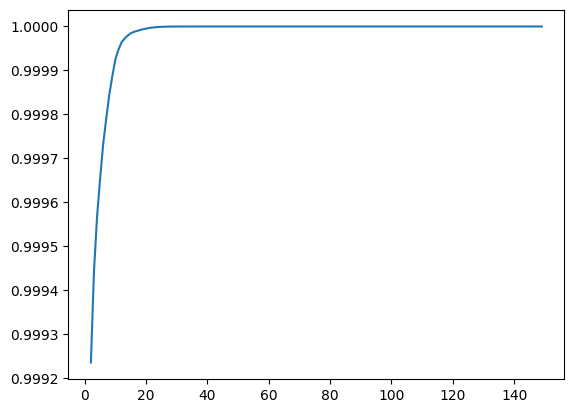

In [62]:
# plotting variance ratio
pd.Series(var_ratio).plot()

**Kneed algorithm to find the elbow point**

<Figure size 500x500 with 0 Axes>

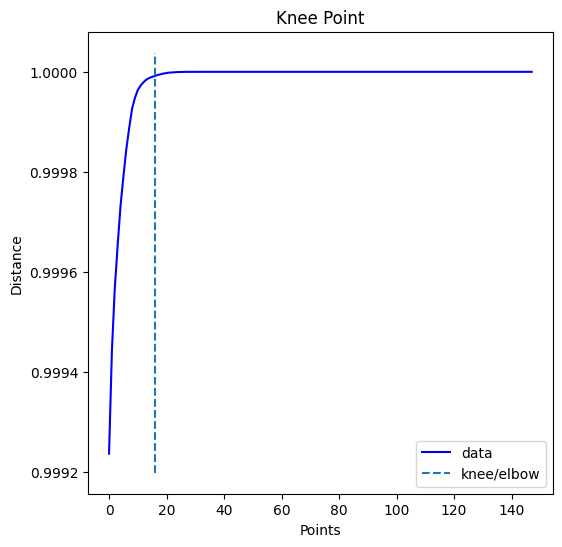

Knee Locater k= 18


In [66]:
from kneed import KneeLocator
from matplotlib import figure

i = np.arange(len(var_ratio))
variance_ratio = list(var_ratio.values())
components = list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k = components[knee.knee]
print('Knee Locater k=', k)

In [67]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=18,random_state=42).fit(X_res)

reduced=pca_final.fit_transform(X_pca)

In [68]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(reduced, y)

In [69]:
# Training all models
report_pca = evaluate_models(X_res,y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9986
- F1 score: 0.9985
- Precision: 1.0000
- Recall: 0.9971
- Roc Auc Score: 0.9985
- COST: 40500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9820
- F1 score: 0.9822
- Precision: 0.9764
- Recall: 0.9881
- Roc Auc Score: 0.9819
- COST: 43680.


Decision Tree
Model performance for Training set
- Accuracy: 0.9986
- F1 score: 0.9985
- Precision: 1.0000
- Recall: 0.9971
- Roc Auc Score: 0.9985
- COST: 40500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9723
- F1 score: 0.9726
- Precision: 0.9684
- Recall: 0.9767
- Roc Auc Score: 0.9722
- COST: 84240.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9407
- F1 score: 0.9403
- Precision: 0.9448
- Recall: 0.9357
- Roc Auc Score: 0.9406
- COST: 912250.
----------------------------------
Model performance for Test set
- Accuracy: 0.9402
- F1 score: 0.9405
- Precision: 0.9426
- Recall: 0.9383
-

In [70]:
report_pca

,Model Name,Cost
0,Random Forest,43680
5,XGBClassifier,55560
6,CatBoosting Classifier,66230
1,Decision Tree,84240
4,K-Neighbors Classifier,93850
2,Gradient Boosting,221020
7,AdaBoost Classifier,302700
3,Logistic Regression,715750


In [75]:
print(report_knn)

print('----------------------------------')

print(report_median)

print('----------------------------------')

print(report_mice)

print('----------------------------------')

print(report_const)

print('----------------------------------')

print(report_mean)

print('----------------------------------')

print(report_pca)

print('----------------------------------')


               Model Name    Cost
5           XGBClassifier    3970
6  CatBoosting Classifier   10050
0           Random Forest   11310
1           Decision Tree   26340
4  K-Neighbors Classifier   39850
2       Gradient Boosting   44850
7     AdaBoost Classifier   84750
3     Logistic Regression  302350
----------------------------------
               Model Name    Cost
5           XGBClassifier    6100
6  CatBoosting Classifier    6260
0           Random Forest   12470
1           Decision Tree   31800
2       Gradient Boosting   48240
4  K-Neighbors Classifier   54430
7     AdaBoost Classifier   89540
3     Logistic Regression  311160
----------------------------------
               Model Name    Cost
5           XGBClassifier    9170
6  CatBoosting Classifier   14710
0           Random Forest   17740
1           Decision Tree   46700
2       Gradient Boosting   47370
4  K-Neighbors Classifier   54870
7     AdaBoost Classifier   91490
3     Logistic Regression  159870
------------

## Final Model

In [76]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Total_cost"]
pt.add_row(["XGBClassifier","Simple Imputer-Constant","2970"])
pt.add_row(["XGBClassifier","Mice","9170"])
pt.add_row(["XGBClassifier","Knn-Imputer","3970"])
pt.add_row(["XGBClassifier","Simple Imputer-Mean","1930"])
pt.add_row(["XGBClassifier","Median","6100"])
pt.add_row(["Random Forest","PCA","43680"])
print(pt)

+---------------+-------------------------+------------+
|     Model     |    Imputation_method    | Total_cost |
+---------------+-------------------------+------------+
| XGBClassifier | Simple Imputer-Constant |    2970    |
| XGBClassifier |           Mice          |    9170    |
| XGBClassifier |       Knn-Imputer       |    3970    |
| XGBClassifier |   Simple Imputer-Mean   |    1930    |
| XGBClassifier |          Median         |    6100    |
| Random Forest |           PCA           |   43680    |
+---------------+-------------------------+------------+


**Report**
- From the final report we can see than XGBClassifier with Simple imputer with strategy mean has performed the best with cost of 1930

### Fitting the Final model and get reports

In [78]:
final_model = XGBClassifier()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42, sampling_strategy="minority", n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [80]:
print("Final XGBoost Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final XGBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final XGBoost Classifier Accuracy Score (Train) : 0.9999821810406272
Final XGBoost Classifier Accuracy Score (Test) : 0.9967213114754099


In [81]:
print("Final XGBoost Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final XGBoost Classifier Cost Metric(Test) : 1930


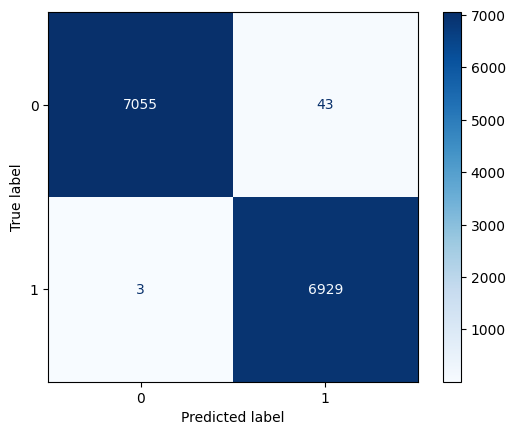

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.show()


## The best Model is XGBoost Classifier with 99.6% accuracy and cost of 1930